## Intro to Pandas
Pandas is a software library written for the Python programming language for data manipulation and analysis.

In [1]:
import pandas as pd
import numpy as np

In [2]:
columns = ['A', 'B', 'C', 'D']
data = np.array([[1, 2, -1, 0], [3, -1, 2, 5], [-1, 4, 0, 2], [-1, -2, 3, 0]])
df = pd.DataFrame(data=data, columns=columns)

In [3]:
df

,A,B,C,D
0,1,2,-1,0
1,3,-1,2,5
2,-1,4,0,2
3,-1,-2,3,0


In [4]:
df['A']

0    1
1    3
2   -1
3   -1
Name: A, dtype: int32

In [5]:
df[['A', 'C']]

,A,C
0,1,-1
1,3,2
2,-1,0
3,-1,3


In [6]:
# new column
df['E'] = df['A'] + df['B']

In [7]:
df[df>0]

,A,B,C,D,E
0,1.0,2.0,NaN,NaN,3.0
1,3.0,NaN,2.0,5.0,2.0
2,NaN,4.0,NaN,2.0,3.0
3,NaN,NaN,3.0,NaN,NaN


In [8]:
df[df>0]['E']

0    3.0
1    2.0
2    3.0
3    NaN
Name: E, dtype: float64

## Titanic dataset

In [9]:
#https://www.kaggle.com/c/titanic/data

url='https://drive.google.com/file/d/1zyYJMa75UXLjmODPRnl4_UrLJ0JKmEOC/view?usp=sharing'
url_='https://drive.google.com/uc?id=' + url.split('/')[-2]
df_train = pd.read_csv(url_)

In [10]:
df_train.shape

(891, 12)

In [11]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
df_train[['Age', 'Fare']].describe()

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


In [14]:
df_train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [15]:
df_train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [16]:
df_train[["Sex", "Age"]].groupby("Sex").mean()

,Age
Sex,
female,27.915709
male,30.726645


## Data Visualization with seaborn

### Missing Data

<AxesSubplot:>

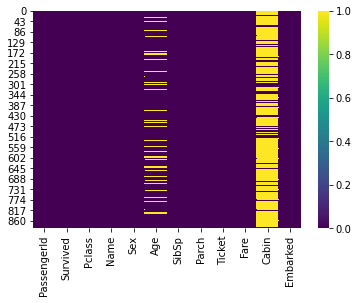

In [17]:
import seaborn as sns

sns.heatmap(df_train.isnull(), cmap='viridis')

<AxesSubplot:xlabel='Survived', ylabel='count'>

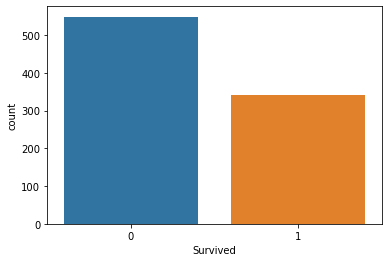

In [18]:
# sns.set_style('whitegrid')
sns.countplot(x='Survived',data=df_train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

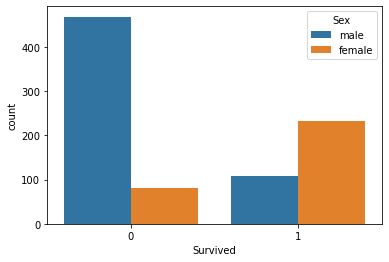

In [19]:
sns.countplot(x='Survived',hue='Sex',data=df_train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

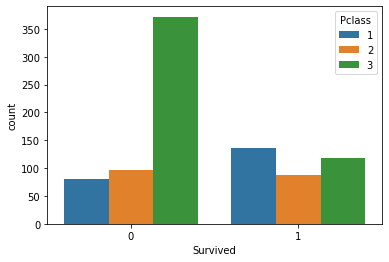

In [20]:
sns.countplot(x='Survived',hue='Pclass',data=df_train)

<AxesSubplot:xlabel='Age', ylabel='Count'>

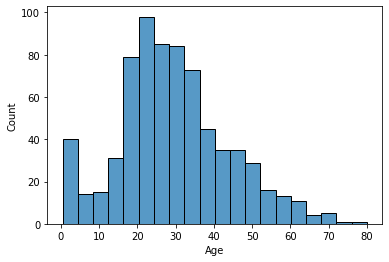

In [21]:
sns.histplot(df_train['Age']) 

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

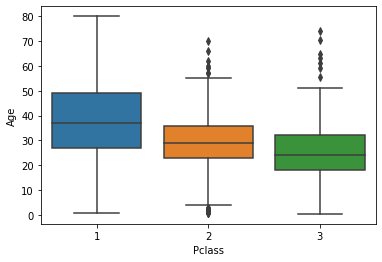

In [22]:
sns.boxplot(x='Pclass',y='Age',data=df_train)